<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_chd/blob/main/CHD_Camila's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project #2**: build predictive algorithms that predict the likelihood a person develops coronary heart disease (CHD)

In [2]:
! git clone https://github.com/Catherine-Nguyen88/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 95 (delta 51), reused 27 (delta 25), pack-reused 32
Receiving objects: 100% (95/95), 2.53 MiB | 4.82 MiB/s, done.
Resolving deltas: 100% (66/66), done.


KNN

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Import train and testing datasets
train_data = pd.read_csv('/content/project_chd/fhs_train.csv')
test_data = pd.read_csv('/content/project_chd/fhs_test.csv')

**1) Clean Data**

In [12]:
print(train_data.shape)
train_data.head()

(3180, 17)


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [13]:
print(test_data.shape)
test_data.head()

(1060, 17)


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [14]:
test_data.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1060.000000,1060.000000,1060.000000,1040.000000,1060.000000,1055.000000,1044.000000,1060.000000,1060.000000,1060.000000,1049.000000,1060.000000,1060.000000,1056.000000,1059.000000,957.000000,1060.000000
mean,2092.777358,0.417925,49.418868,2.046154,0.503774,9.111848,0.029693,0.003774,0.279245,0.024528,236.995234,131.064151,82.237736,25.539100,75.689330,82.357367,0.148113
std,1201.024284,0.493450,8.620858,1.042774,0.500222,11.650215,0.169822,0.061342,0.448840,0.154755,43.835233,20.743991,11.589415,3.914418,11.953153,24.931659,0.355380
min,4.000000,0.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,92.500000,48.000000,15.960000,45.000000,44.000000,0.000000
25%,1054.500000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.000000,22.850000,68.000000,72.000000,0.000000
50%,2074.500000,0.000000,49.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,235.000000,127.000000,81.000000,25.140000,75.000000,78.000000,0.000000
75%,3093.500000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,140.125000,88.000000,27.860000,82.000000,87.000000,0.000000
max,4235.000000,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,453.000000,215.000000,140.000000,45.790000,143.000000,394.000000,1.000000


In [15]:
train_data.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [29]:
train_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
train_final = train_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                          'diabetes', 'totChol', 'sysBP',
                          'diaBP', 'BMI', 'TenYearCHD']]
#
test_data1 = test_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
test_final = test_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                                'diabetes', 'totChol', 'sysBP',
                                  'diaBP', 'BMI', 'TenYearCHD']]


#Drop nans
test_final = test_data1.dropna()
train_final = test_data1.dropna()

#Splitting Sample
y_train = train_final['TenYearCHD']
x_train = train_final.drop('TenYearCHD', axis=1)

y_test = test_final['TenYearCHD']
x_test = test_final.drop('TenYearCHD', axis=1)

**2) Maxmin normalize year and mileage.**

In [30]:
#Maxmin Normlize
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**3) Use the KNN algorithm for regression and the training data to predict TenYearCHD using cigsPerDay and age for the test set for**


In [32]:
for k in [3, 10, 25, 50, 100, 101, 125, 150, 200, 300]:
  model = KNeighborsRegressor(n_neighbors=k).fit(x_train_scaled, y_train)
  yhat = model.predict(x_test_scaled)
  mse = np.sum((y_test - yhat)**2)
  print('k: '+str(k)+', MSE: '+str(mse))

k: 3, MSE: 67.11111111111111
k: 10, MSE: 95.13000000000002
k: 25, MSE: 101.0624
k: 50, MSE: 104.02
k: 100, MSE: 104.8191
k: 101, MSE: 104.9378492304676
k: 125, MSE: 105.33702400000001
k: 150, MSE: 106.0384
k: 200, MSE: 106.705025
k: 300, MSE: 107.91337777777778


[1]


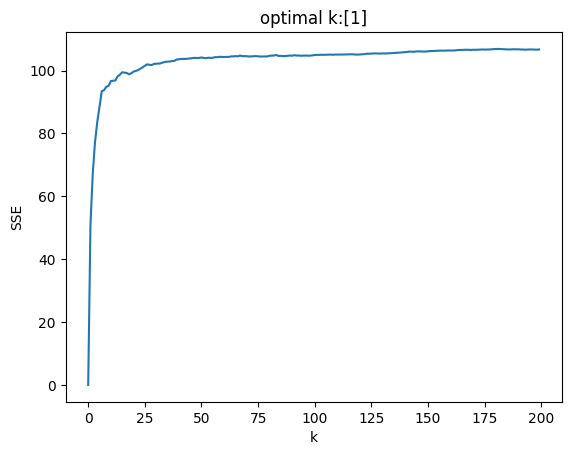

In [34]:
# Determine the optimal k:
kbar = 200
kgrid = np.arange(1,kbar)
SSE = np.zeros(kbar)

for k in range(kbar):
  fitModel = KNeighborsRegressor(n_neighbors=k+1).fit(x_train_scaled, y_train)
  yhat = fitModel.predict(x_test_scaled) #Predict for values test
  SSE[k] = np.sum((y_test - yhat)**2)

SSEmin = np.min(SSE) #Lowest SSE
minIndex = np.where(SSE==SSEmin)
kstar = kgrid[minIndex]
print(kstar)

plt.plot(np.arange(0,kbar), SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(kstar))
plt.ylabel('SSE')
plt.show()

**4) What happened in the plots of predicted versus actual TenYearCHD as varied?**

The optimal k is roughly 174. Underfitting occurs when your model is too simple to reliably explain the phenomenon which would in this case happen at values below ADDD. Overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in for values above ADDD. The horizontal bunching is a result of over-fitting and the predictions below ADD have a low precision. There is a negative correlation between k and the variance of predictions. Predictions decrease with higher k and values have less of an influence.

**For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary table of TenYearCHD grouped by the variable.**

In [42]:
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']

for var in vars:
    print(test_final.loc[:,[var,'TenYearCHD']].groupby(var).describe())

    TenYearCHD                                             
         count      mean       std  min  25%  50%  75%  max
sex                                                        
0        530.0  0.126415  0.332631  0.0  0.0  0.0  0.0  1.0
1        384.0  0.171875  0.377764  0.0  0.0  0.0  0.0  1.0
              TenYearCHD                                             
                   count      mean       std  min  25%  50%  75%  max
currentSmoker                                                        
0                  465.0  0.126882  0.333199  0.0  0.0  0.0  0.0  1.0
1                  449.0  0.164811  0.371423  0.0  0.0  0.0  0.0  1.0
           TenYearCHD                                              
                count      mean       std  min  25%  50%   75%  max
cigsPerDay                                                         
0.0             465.0  0.126882  0.333199  0.0  0.0  0.0  0.00  1.0
1.0              14.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
2.0       

**matrix of the variables you think are most predictive of a death, and a variable equal to TenYearCHD.**

In [44]:
y = test_final['TenYearCHD']
vars = ['age','sysBP','diaBP','prevalentHyp']
X = test_final.loc[:,vars]

#Maxmin normalize all of the variables in X
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

**Determine the optimal number of neighbors for a KNN regression for the variables you selected bold**

[18]


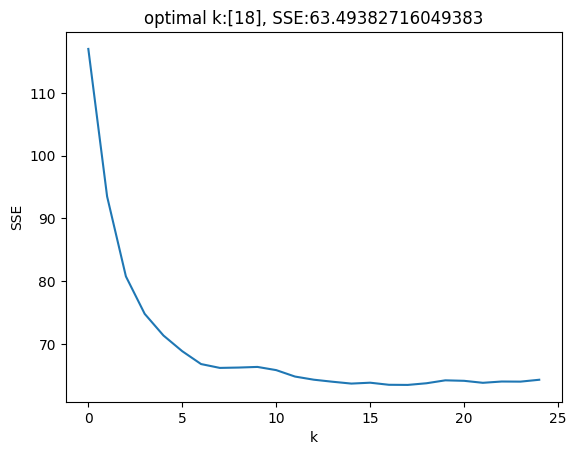

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 25
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case?